In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
df = pd.read_csv('data/eu_trade_sums.csv')

In [5]:
df = df.set_index('geo')

In [6]:
df.head()

,trade_type,partner,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000,1999
geo,,,,,,,,,,,,,,,,,,,
AT,Export,EU28,193043.0,187548.0,184865.0,181689.0,181889.0,166299.0,143052.0,181180.0,176327.0,159517.0,147064.0,142481.0,131439.0,126666.0,NaN,NaN,NaN
AT,Export,EXT_EU28,82468.0,80797.0,78903.0,77668.0,73038.0,63858.0,53376.0,65339.0,62447.0,58309.0,53871.0,46923.0,40317.0,39731.0,NaN,NaN,NaN
AT,Import,EU28,215023.0,210492.0,211444.0,212546.0,212734.0,187011.0,160875.0,197137.0,190105.0,175463.0,165908.0,160883.0,144982.0,134624.0,NaN,NaN,NaN
AT,Import,EXT_EU28,65242.0,63511.0,64554.0,65337.0,62293.0,52877.0,44262.0,53467.0,47817.0,43097.0,38657.0,31628.0,30994.0,30983.0,NaN,NaN,NaN
BE,Export,EU28,517836.0,502888.0,495145.0,486102.0,492083.0,449191.0,402557.0,493688.0,478972.0,446775.0,412912.0,380546.0,349210.0,345248.0,NaN,NaN,NaN


In [7]:
np.unique(df.index)

array(['AT', 'BE', 'BG', 'CY', 'CZ', 'DE', 'DK', 'EE', 'EL', 'ES', 'EU28',
       'FI', 'FR', 'HR', 'HU', 'IE', 'IT', 'LT', 'LU', 'LV', 'MT', 'NL',
       'PL', 'PT', 'RO', 'SE', 'SI', 'SK', 'UK'], dtype=object)

In [8]:
df = df.drop('EU28')

In [9]:
means = df.groupby(['trade_type', 'partner']).transform(np.mean)

In [10]:
std_dev = df.groupby(['trade_type', 'partner']).transform(np.std)

In [11]:
std_df = df.copy()

In [12]:
for col in df.columns:
    try:
        std_df[col] = (df[col] - means[col]) / std_dev[col]
    except Exception as e:
        print(e)

'trade_type'
'partner'


In [13]:
std_df.head()

,trade_type,partner,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000,1999
geo,,,,,,,,,,,,,,,,,,,
AT,Export,EU28,-0.086965,-0.076124,-0.064367,-0.075003,-0.070421,-0.063902,-0.067878,-0.052453,-0.055375,-0.079547,-0.054568,-0.030768,-0.031377,-0.049910,NaN,NaN,NaN
AT,Export,EXT_EU28,-0.212533,-0.204310,-0.223869,-0.216133,-0.209617,-0.206554,-0.193820,-0.185042,-0.178663,-0.176183,-0.170439,-0.179379,-0.206098,-0.220213,NaN,NaN,NaN
AT,Import,EU28,0.007817,0.025101,0.052658,0.057036,0.062110,0.041522,0.037609,0.028627,0.014970,0.007480,0.058364,0.093032,0.078646,0.029620,NaN,NaN,NaN
AT,Import,EXT_EU28,-0.324356,-0.332415,-0.325622,-0.338957,-0.343098,-0.356200,-0.345581,-0.377778,-0.377290,-0.383773,-0.371840,-0.385474,-0.365862,-0.359435,NaN,NaN,NaN
BE,Export,EU28,0.988470,1.020009,1.051596,1.015604,1.037844,1.044755,1.099431,1.077707,1.049481,1.052002,1.117633,1.082268,1.066784,1.074291,NaN,NaN,NaN


In [14]:
yrs = [str(yr) for yr in range(2002, 2016)]

In [15]:
yrs

['2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015']

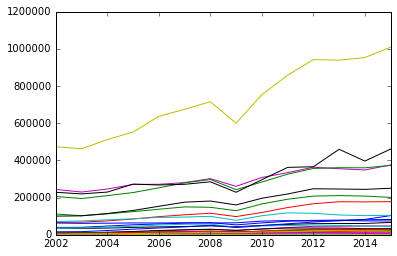

In [16]:
df[(df['trade_type'] == 'Export') & 
   (df['partner'] == 'EXT_EU28')][yrs].T.plot(legend=False)

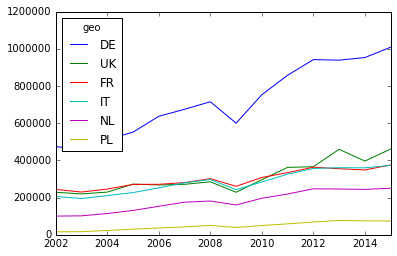

In [17]:
df[(df['trade_type'] == 'Export') & 
   (df['partner'] == 'EXT_EU28')].loc[
    ['DE', 'UK', 'FR', 'IT', 'NL', 'PL']][yrs].T.plot()

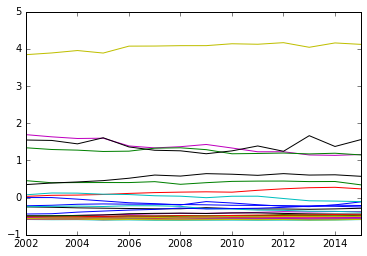

In [18]:
std_df[(std_df['trade_type'] == 'Export') & 
   (std_df['partner'] == 'EXT_EU28')][yrs].T.plot(legend=False)

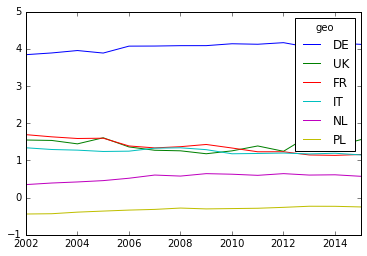

In [19]:
std_df[(std_df['trade_type'] == 'Export') & 
   (std_df['partner'] == 'EXT_EU28')].loc[
    ['DE', 'UK', 'FR', 'IT', 'NL', 'PL']][yrs].T.plot()

In [20]:
normed_df = df.copy()

In [21]:
mins = df.groupby(['trade_type', 'partner']).transform(np.min)

In [22]:
maxs = df.groupby(['trade_type', 'partner']).transform(np.max)

In [23]:
for col in df.columns:
    try:
        normed_df[col] = (df[col] - mins[col]) / (maxs[col] - mins[col])
    except Exception as e:
        print(e)

'trade_type'
'partner'


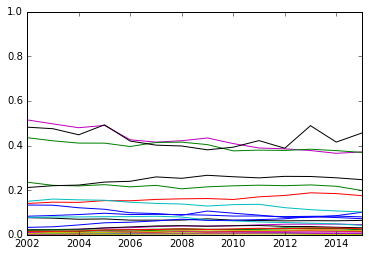

In [24]:
normed_df[(normed_df['trade_type'] == 'Export') & 
   (normed_df['partner'] == 'EXT_EU28')][yrs].T.plot(legend=False)

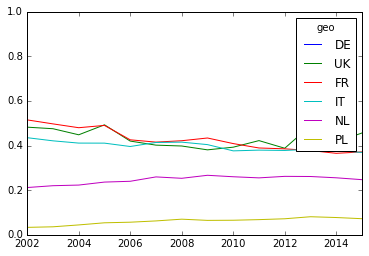

In [25]:
normed_df[(normed_df['trade_type'] == 'Export') & 
   (normed_df['partner'] == 'EXT_EU28')].loc[
    ['DE', 'UK', 'FR', 'IT', 'NL', 'PL']][yrs].T.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x113049690>]], dtype=object)

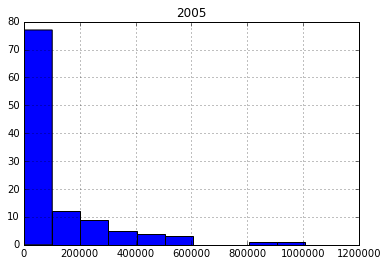

In [26]:
df.hist('2005')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x113063550>]], dtype=object)

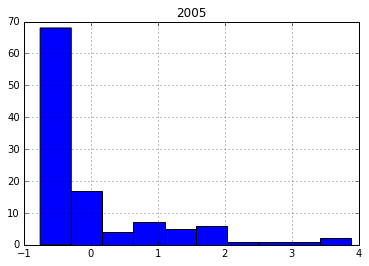

In [27]:
std_df.hist('2005')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1131db910>]], dtype=object)

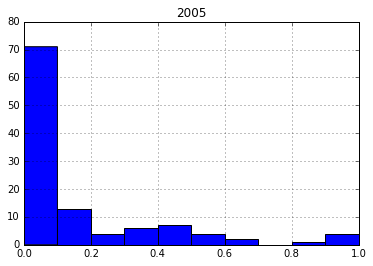

In [28]:
normed_df.hist('2005')